<h1>Face Recognition using EigenFaces</h1>
<p>PCA is used to project high dimensional data to reduced lower dimensional data. Its a special case of Singular Value Decomposition where the matrix to be projected is a square matrix. PCA finds a new space in which every point can be projected using a different vector. Here, I have implemented one application of PCA which is EigenFaces. This is a very useful method for face recognition systems. Eigenfaces are eigenvectors, which form the basis set for all the images in data. all the images in the data can be represented using these eigenfaces.</p>

In [1]:
#Loading nessery libararies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
#The dataset I used here is called Labeled Faces in the Wild. It is a database of different faces designed for studying the problem of face recognition.
#First, we will load the data first and split it into 2 parts, training set and testing set. testing set contains 30% of total data.

lfw = fetch_lfw_people(min_faces_per_person=100)
dataX = lfw.data
dataY = lfw.target
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.3,random_state=10)

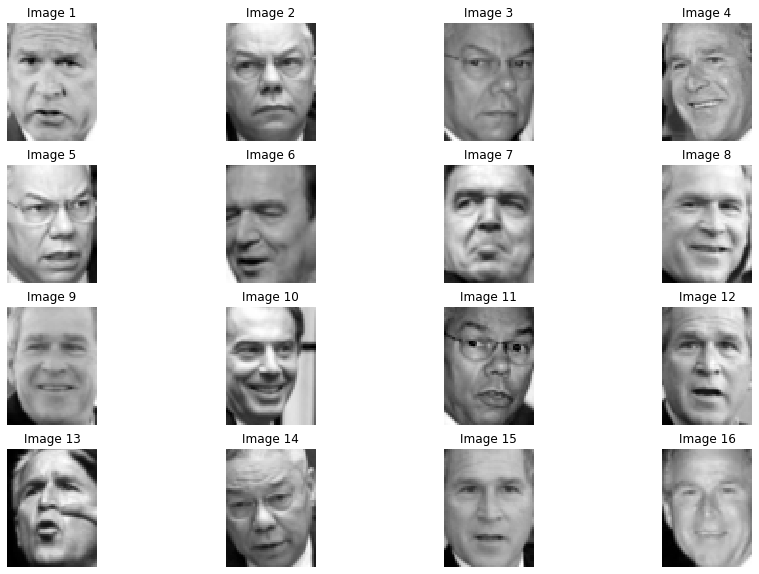

In [3]:
plt.figure(figsize=(15,10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(trainX[i].reshape((62, 47)), cmap=plt.cm.gray)
    plt.title("Image {0}".format(i+1))
    plt.axis('off')
    
    #here, we can see some sample images. all the images are in gray scale of size 62x47.

Text(0, 0.5, 'Variance')

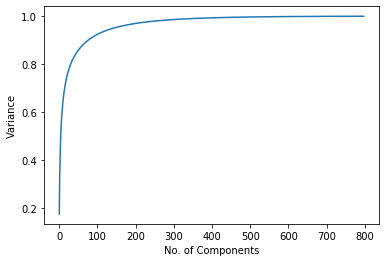

In [4]:
#Now, we will extract principal components of the data.
pca = PCA().fit(trainX)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('No. of Components')
plt.ylabel('Variance')

In [5]:
np.where(pca.explained_variance_ratio_.cumsum()<0.95)
#Here, we can see that 140 components explain 95% of variance.Thus, we will use the 140 principal components. 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140], dtype=int64),)

In [6]:
#Generate Principal Components 
n_comp = 140
pca=PCA(n_components=n_comp).fit(trainX)

#Applying PCA transformation
pca_trainX = pca.transform(trainX)
pca_testX = pca.transform(testX)

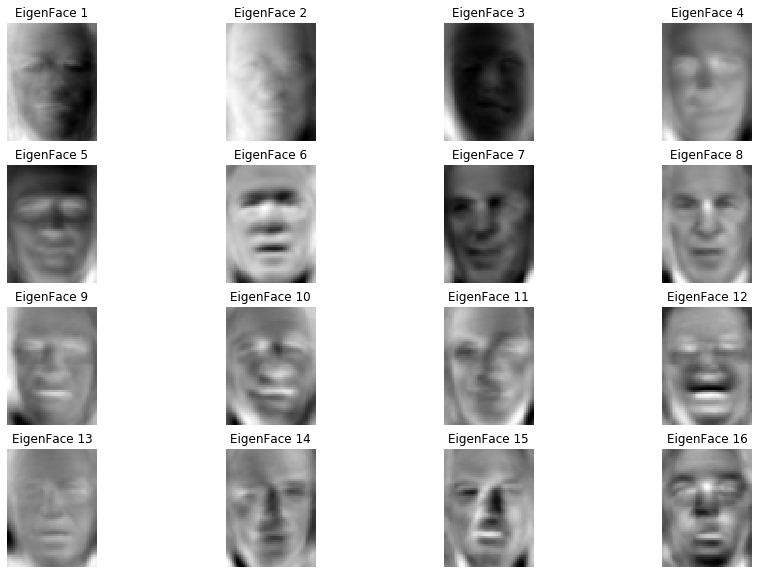

In [7]:
#Now, lets visualize these principal components
#These are the 16 eigenfaces of total 140 eigenfaces, which act as the basis for all the images in data.
plt.figure(figsize=(15,10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(pca.components_[i].reshape((62, 47)), cmap=plt.cm.gray)
    plt.title("EigenFace {0}".format(i+1))
    plt.axis('off')

In [8]:
#Using Support Vector Machine to classifiy the data 
clf = SVC()
clf.fit(pca_trainX, trainY)
predictions = clf.predict(pca_testX)
print(classification_report(testY, predictions, target_names=lfw.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.84      0.82      0.83        78
  Donald Rumsfeld       0.94      0.44      0.60        36
    George W Bush       0.69      0.97      0.80       143
Gerhard Schroeder       0.93      0.32      0.47        41
       Tony Blair       0.77      0.61      0.68        44

         accuracy                           0.75       342
        macro avg       0.83      0.63      0.68       342
     weighted avg       0.79      0.75      0.73       342

